In [1]:
from datasets import load_dataset

dataset = load_dataset("yelp_polarity")
train = dataset["train"]
test = dataset["test"]

print(train[0])
print(len(train), len(test))

{'text': "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.", 'label': 0}
560000 38000


label
0    280000
1    280000
Name: count, dtype: int64


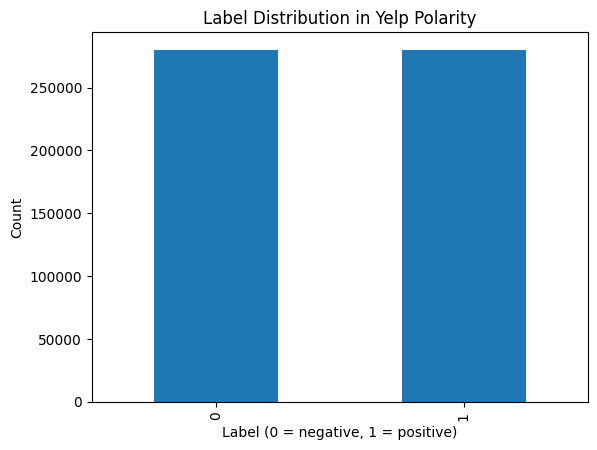

,text,label
92396,I didn't book this. If I had I would have read...,0
74169,We walked in at 8:50p and they said they would...,0
47575,Love this location but the one down the street...,1
480517,The owners were incredibly nice and so was the...,1
531792,This shop is definitely tucked out of the way ...,1


In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load dataset
dataset = load_dataset("yelp_polarity")
train = dataset["train"]
test = dataset["test"]

# Convert to pandas for easier EDA
df = pd.DataFrame(train)

# Show class distribution
print(df['label'].value_counts())

# Plot class distribution
df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution in Yelp Polarity")
plt.xlabel("Label (0 = negative, 1 = positive)")
plt.ylabel("Count")
plt.show()

# Show random examples
df.sample(5)


In [3]:
#文本长度分析
import pandas as pd
import matplotlib.pyplot as plt

# 假设你已经有 df = pd.DataFrame(train)
df['char_len'] = df['text'].apply(len)
df['word_len'] = df['text'].apply(lambda x: len(x.split()))

df[['char_len', 'word_len']].describe()

,char_len,word_len
count,560000.000000,560000.000000
mean,726.497923,133.028873
std,669.844273,122.611613
min,1.000000,1.000000
25%,279.000000,51.000000
50%,528.000000,97.000000
75%,947.000000,174.000000
max,5273.000000,1052.000000


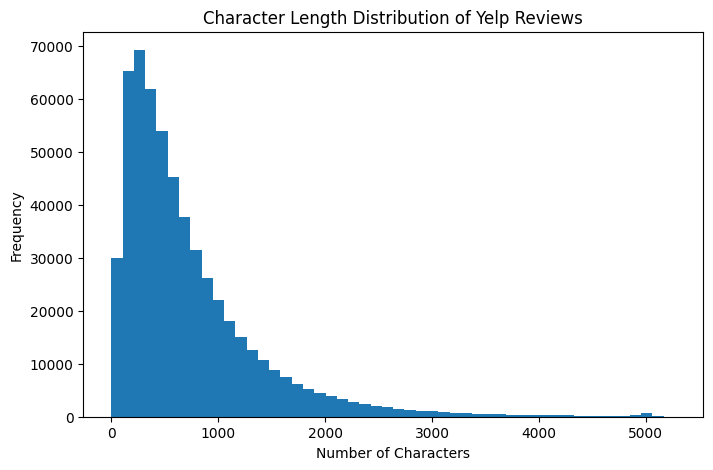

In [4]:
#字符长度直方图
plt.figure(figsize=(8,5))
plt.hist(df['char_len'], bins=50)
plt.title("Character Length Distribution of Yelp Reviews")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


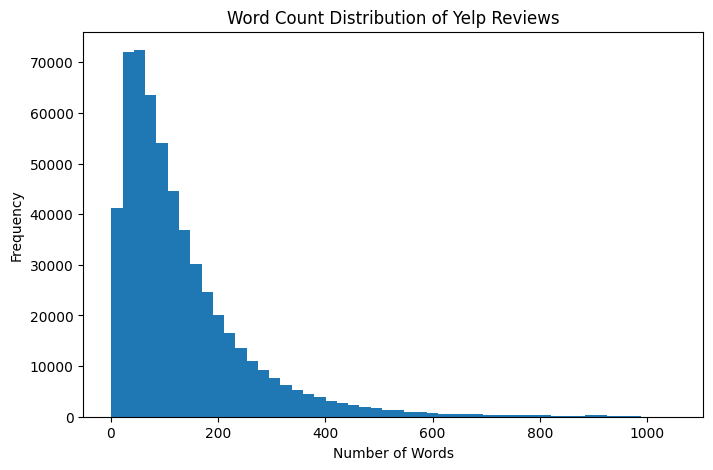

In [5]:
#单词长度直方图
plt.figure(figsize=(8,5))
plt.hist(df['word_len'], bins=50)
plt.title("Word Count Distribution of Yelp Reviews")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [6]:
#定义清洗函数并生成 clean_text
import re

def basic_clean(text: str) -> str:
    # 确保是字符串
    text = str(text)
    # 1. 去掉简单 HTML 标签（例如 <br />）
    text = re.sub(r"<.*?>", " ", text)
    # 2. 全部转小写
    text = text.lower()
    # 3. 将换行、制表符、多空格统一为单个空格
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(basic_clean)

# 看一下清洗前后对比
df[['text', 'clean_text']].sample(5)

,text,clean_text
475400,This place is one of the nicest Walgreens I ha...,this place is one of the nicest walgreens i ha...
308973,Awesome place to grab breakfast and lunch in T...,awesome place to grab breakfast and lunch in t...
319802,Got to meet up for dinner with friends last ni...,got to meet up for dinner with friends last ni...
43929,My only complaint is that they won't refill a ...,my only complaint is that they won't refill a ...
165701,I ended up having dinner here on a recent trip...,i ended up having dinner here on a recent trip...


In [7]:
#清洁版
def to_ascii(text: str) -> str:
    return text.encode("ascii", "ignore").decode("ascii")

df['clean_text_ascii'] = df['clean_text'].apply(to_ascii)

# 看一下对比
df[['clean_text', 'clean_text_ascii']].sample(5)


,clean_text,clean_text_ascii
275582,i was looking for a new spot for some chinese ...,i was looking for a new spot for some chinese ...
194961,i came here in the summer and i tried it. they...,i came here in the summer and i tried it. they...
269435,i loove culver's! their cheese curds are amazi...,i loove culver's! their cheese curds are amazi...
219924,definitely not a good place to eat with friend...,definitely not a good place to eat with friend...
82160,they closed this location. not sure why - it a...,they closed this location. not sure why - it a...


In [8]:
#高频词分析
from collections import Counter

# 使用 clean_text（避免大小写和换行问题）
all_words = " ".join(df['clean_text']).split()

# 统计词频
word_counts = Counter(all_words)

# 最常见的 30 个词
word_counts.most_common(30)

[('the', 3667713),
 ('and', 2386642),
 ('i', 1907000),
 ('a', 1870142),
 ('to', 1869592),
 ('was', 1311338),
 ('of', 1102077),
 ('for', 843326),
 ('it', 817100),
 ('in', 813368),
 ('is', 812773),
 ('that', 666960),
 ('my', 660629),
 ('we', 591450),
 ('this', 571897),
 ('with', 558697),
 ('they', 557770),
 ('but', 553322),
 ('on', 506815),
 ('you', 503196),
 ('not', 481944),
 ('have', 461398),
 ('had', 421823),
 ('at', 414125),
 ('were', 400906),
 ('so', 358504),
 ('are', 332661),
 ('be', 318134),
 ('as', 288575),
 ('if', 254830)]

In [9]:
#去除stop words后高频词分析
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

# 使用 clean_text（因为 lower + 去 HTML 已完成）
all_words = " ".join(df['clean_text']).split()

# 过滤 stop words
filtered_words = [w for w in all_words if w not in ENGLISH_STOP_WORDS]

# 查看前 30 高频非停用词
Counter(filtered_words).most_common(30)


[('just', 253983),
 ('place', 249927),
 ('like', 248637),
 ('food', 239855),
 ('good', 199198),
 ("it's", 161892),
 ('great', 161230),
 ('really', 157537),
 ('time', 154782),
 ('service', 145110),
 ('got', 131428),
 ("don't", 131138),
 ('-', 121044),
 ("didn't", 111943),
 ("i'm", 102686),
 ('ordered', 100711),
 ('went', 99908),
 ('came', 98856),
 ('did', 96836),
 ("i've", 88964),
 ('little', 88468),
 ('people', 86456),
 ('going', 83964),
 ('nice', 81954),
 ('said', 80917),
 ('order', 80300),
 ('it.', 79474),
 ('make', 79390),
 ('know', 79219),
 ('pretty', 79132)]

In [10]:
#去除中性词
neutral_words = set([
    'just','got','did','dont','didnt',"it's","im","ive","really",
    'time','went','came','got','ordered','order','little',
    'place','food','service','people','like'
])

In [12]:
emotion_stop = set([
    # negation/aux contractions
    'im','i','ive',"i'm","i've","its","it's","dont","don't","didnt","didn't",
    'cant',"can't",'couldnt',"couldn't",'wouldnt',"wouldn't",'isnt',"isn't",
    'wasnt',"wasn't",'arent',"aren't",'werent',"weren't",'theyre',"they're",
    "you're","youre","we're","weve","we'd","shouldnt","shouldn't",

    # action verbs (narrative, not sentiment)
    'come','came','go','going','went','got','get','did','make','made','order',
    'ordered','say','said','told','try','tried','taking','took','taking','give','gave',

    # neutral nouns
    'place','people','time','food','service','restaurant','staff','table','menu',

    # noise tokens
    '-','--','---','-.-','&'
])


In [15]:
pos_words = " ".join(df[df['label']==1]['clean_text']).split()
neg_words = " ".join(df[df['label']==0]['clean_text']).split()

# 过滤 stopwords
pos_filtered = [w for w in pos_words if w not in ENGLISH_STOP_WORDS]
neg_filtered = [w for w in neg_words if w not in ENGLISH_STOP_WORDS]


In [16]:
#正面词统计
pos_filtered3 = [w for w in pos_filtered if w not in emotion_stop]
Counter(pos_filtered3).most_common(30)

[('great', 124192),
 ('good', 110820),
 ('like', 102878),
 ('just', 95792),
 ('really', 80888),
 ('love', 58686),
 ('best', 55495),
 ('little', 52134),
 ('nice', 50144),
 ('definitely', 43118),
 ('pretty', 40317),
 ('it.', 32665),
 ('chicken', 31449),
 ('friendly', 30414),
 ('know', 29231),
 ('new', 28915),
 ('think', 28772),
 ('want', 27593),
 ('good.', 27486),
 ('right', 27012),
 ('bit', 26508),
 ('bar', 25598),
 ('fresh', 25152),
 ('sure', 25004),
 ('way', 24912),
 ('recommend', 24822),
 ('eat', 24374),
 ('vegas', 24314),
 ('wait', 23170),
 ('worth', 23090)]

In [17]:
#负面词统计
neg_filtered3 = [w for w in neg_filtered if w not in emotion_stop]
Counter(neg_filtered3).most_common(30)



[('just', 158191),
 ('like', 145759),
 ('good', 88378),
 ('really', 76649),
 ('asked', 58767),
 ('minutes', 50228),
 ('know', 49988),
 ('it.', 46809),
 ('better', 44896),
 ('want', 42807),
 ('way', 42718),
 ('2', 41714),
 ('think', 41311),
 ('bad', 39017),
 ('pretty', 38815),
 ('room', 37470),
 ('great', 37038),
 ('little', 36334),
 ('wanted', 34787),
 ('chicken', 33586),
 ('customer', 32310),
 ('nice', 31810),
 ('wait', 31734),
 ('new', 31344),
 ('called', 30961),
 ('eat', 30134),
 ('experience', 29207),
 ('left', 28926),
 ('sure', 28057),
 ('3', 27310)]

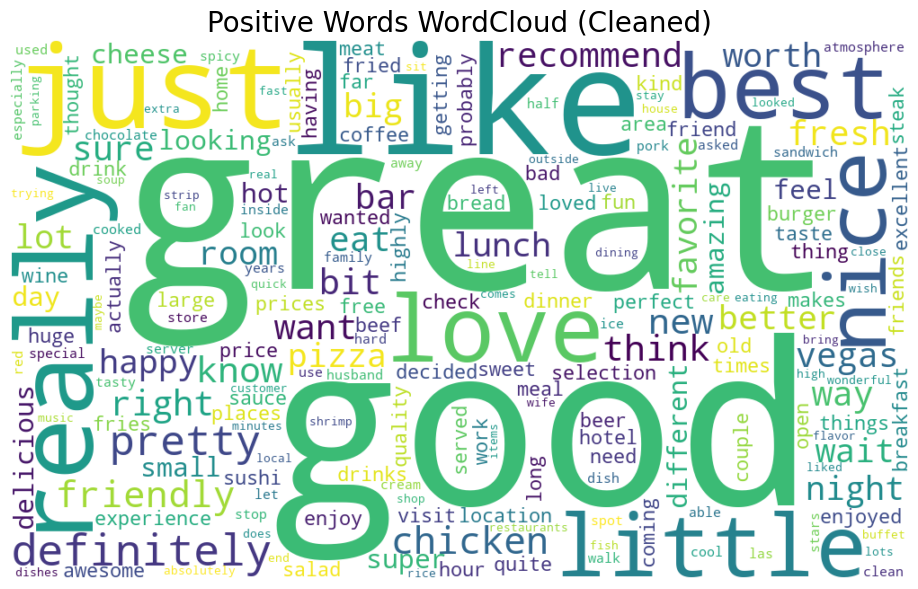

In [18]:
#生成正面词云
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 额外要过滤掉的垃圾 token
junk_words = {
    'n','nt','ne','nw','na','nth','nthis','ni',
    'im',"i'm",'ive',"i've",'dont',"don't",'didnt',"didn't",
    'cant',"can't",'wasnt',"wasn't",'shouldnt',"shouldn't",
    'wouldnt',"wouldn't",'couldnt',"couldn't"
}

# 过滤：长度>2、全字母、不是垃圾词
filtered_pos = [
    w for w in pos_filtered3
    if len(w) > 2 and w.isalpha() and w not in junk_words
]

# 取前 300 高频词（够画词云了）
top_pos_words = dict(Counter(filtered_pos).most_common(300))

wc_pos = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate_from_frequencies(top_pos_words)

plt.figure(figsize=(12,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words WordCloud (Cleaned)", fontsize=20)
plt.show()



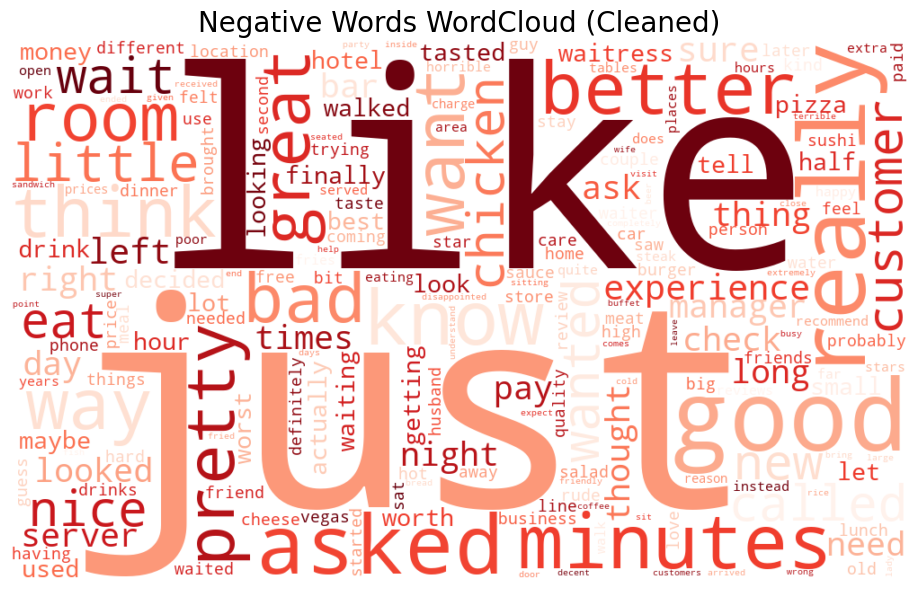

In [19]:
#生成负面词云
filtered_neg = [
    w for w in neg_filtered3
    if len(w) > 2 and w.isalpha() and w not in junk_words
]

top_neg_words = dict(Counter(filtered_neg).most_common(300))

wc_neg = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200,
    colormap='Reds'
).generate_from_frequencies(top_neg_words)

plt.figure(figsize=(12,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words WordCloud (Cleaned)", fontsize=20)
plt.show()
